['astilbe', 'bellflower', 'black_eyed_susan', 'calendula', 'california_poppy', 'carnation', 'common_daisy', 'coreopsis', 'daffodil', 'dandelion', 'iris', 'magnolia', 'rose', 'sunflower', 'tulip', 'water_lily']


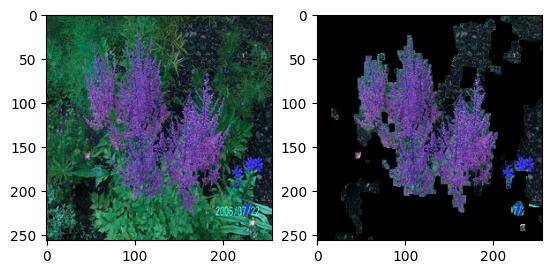

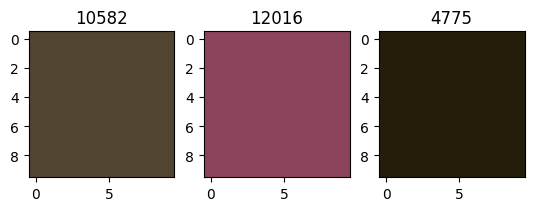

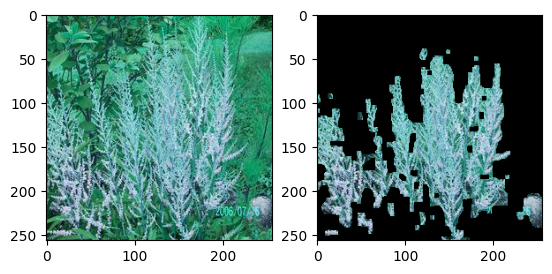

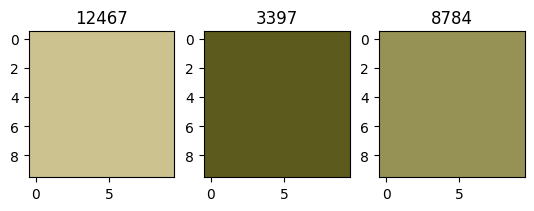

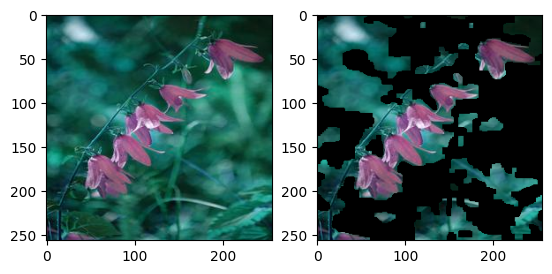

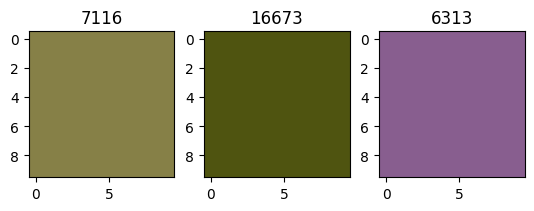

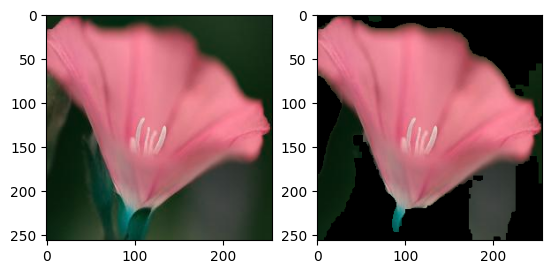

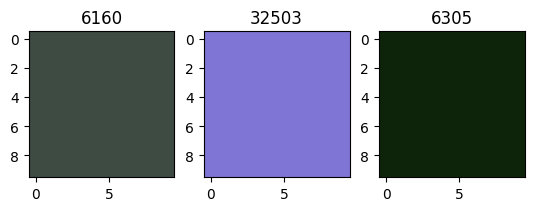

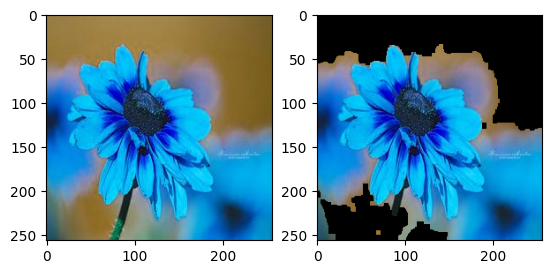

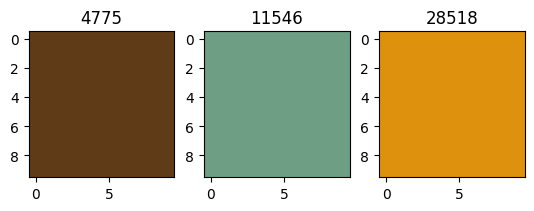

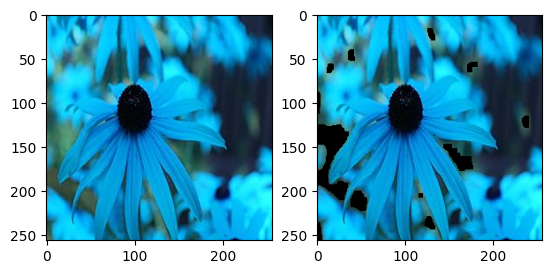

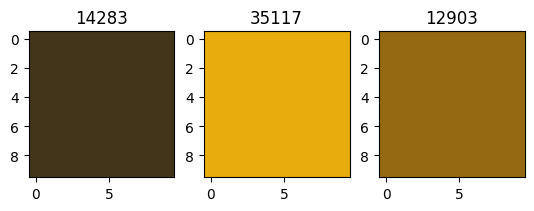

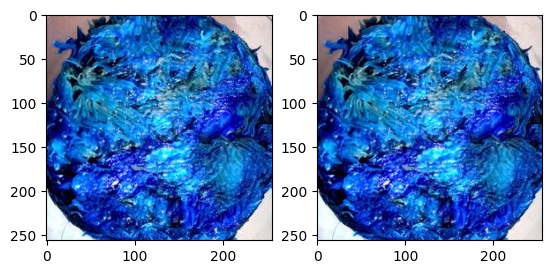

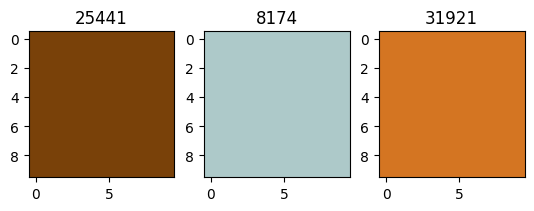

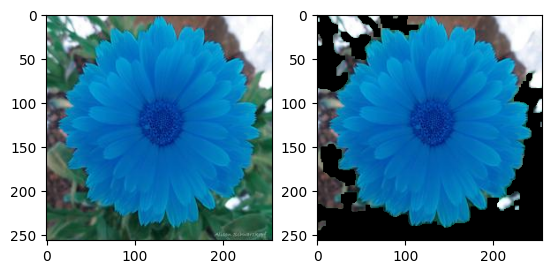

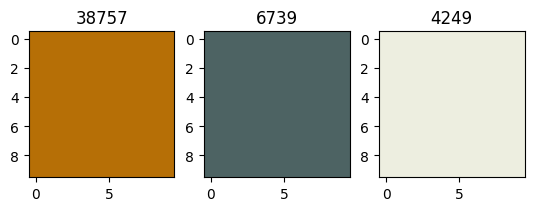

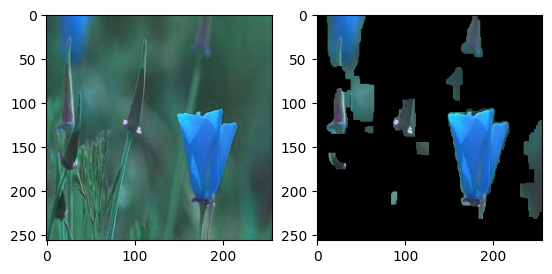

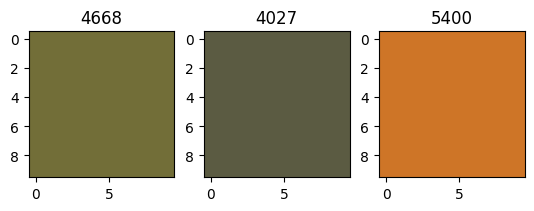

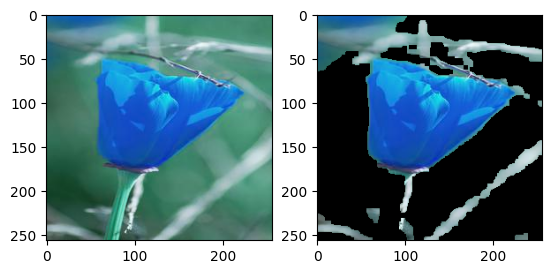

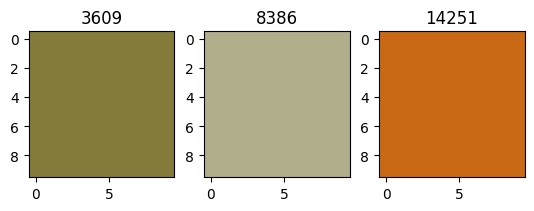

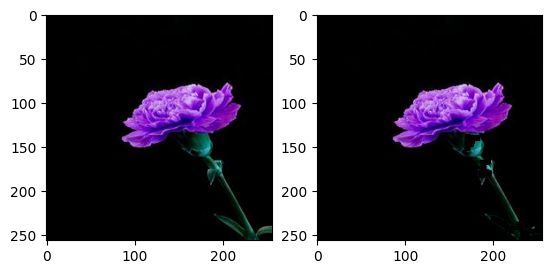

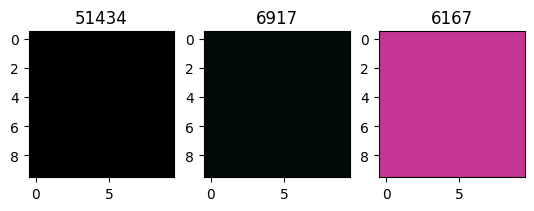

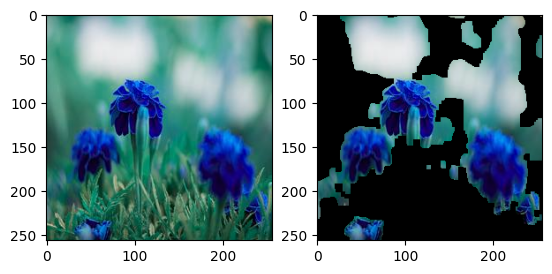

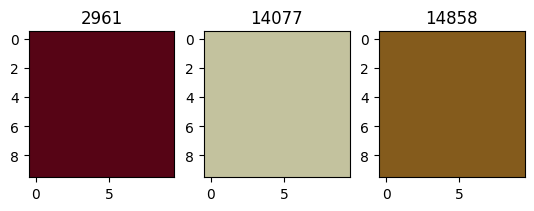

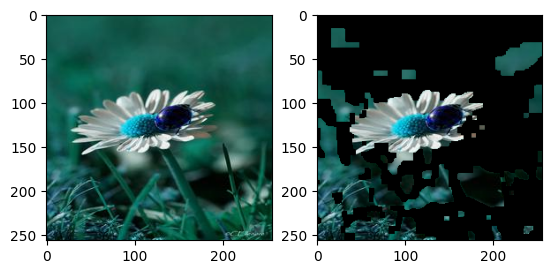

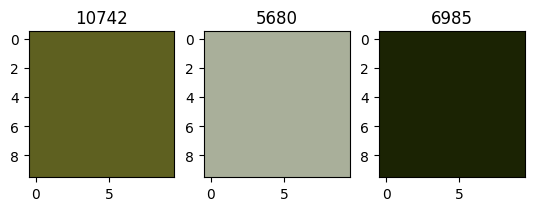

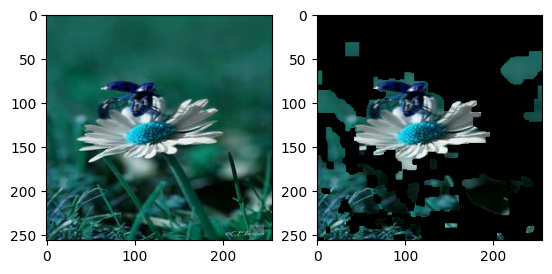

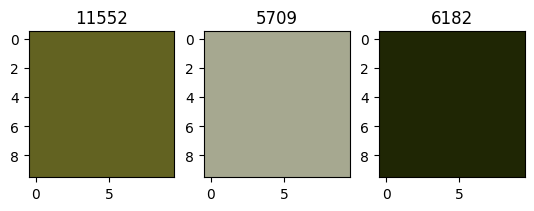

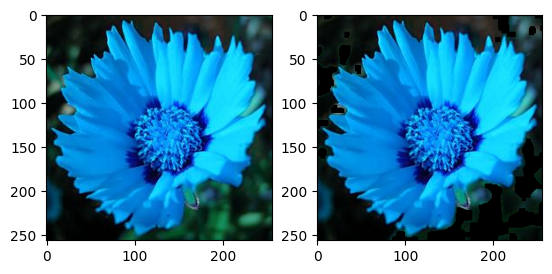

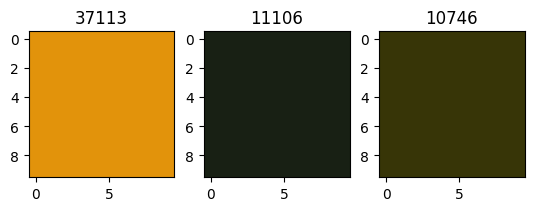

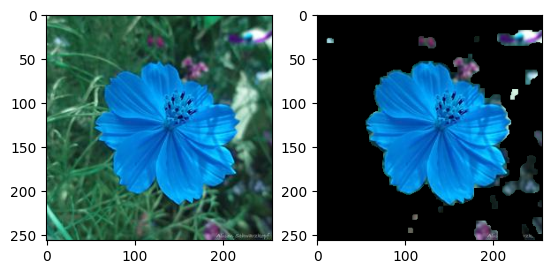

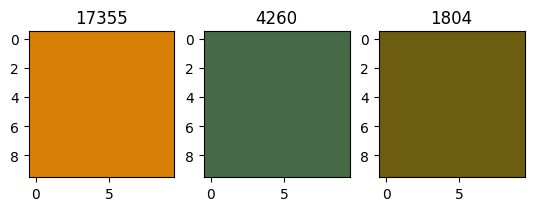

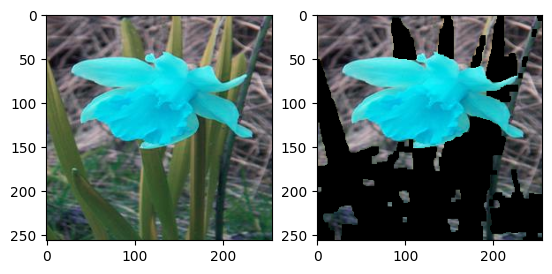

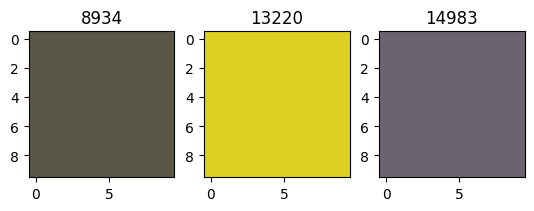

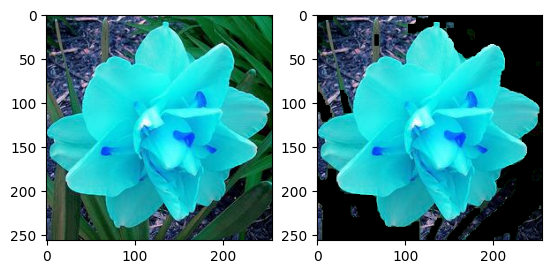

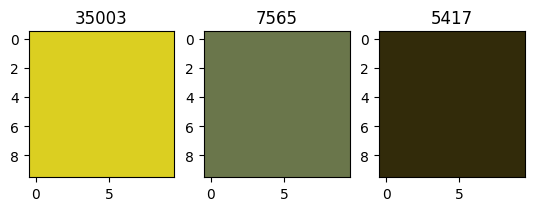

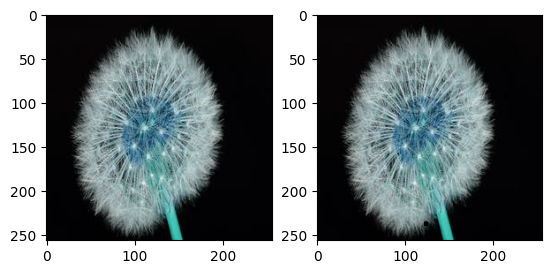

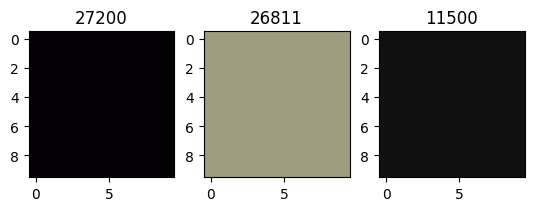

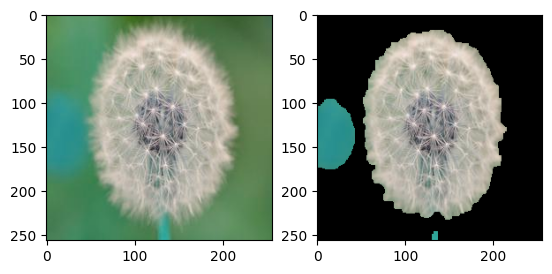

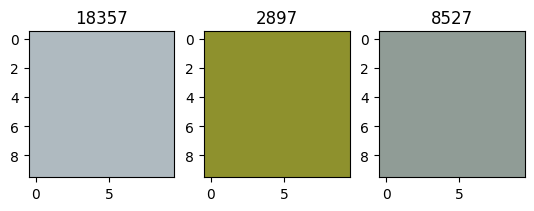

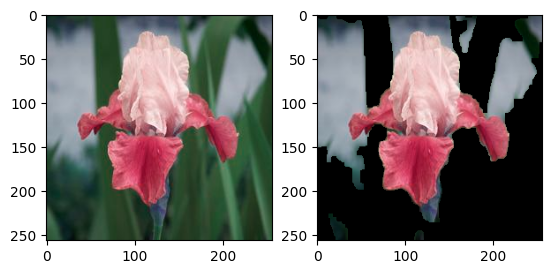

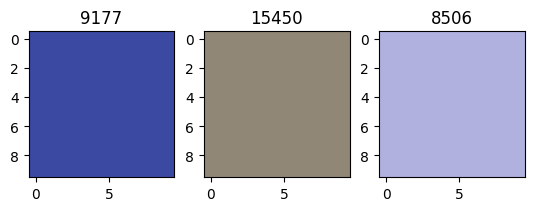

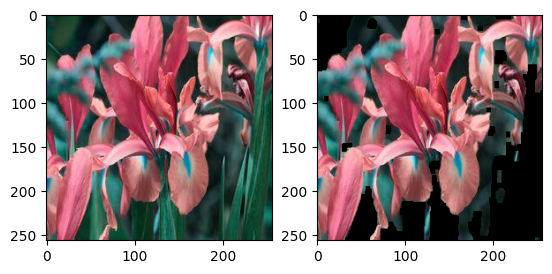

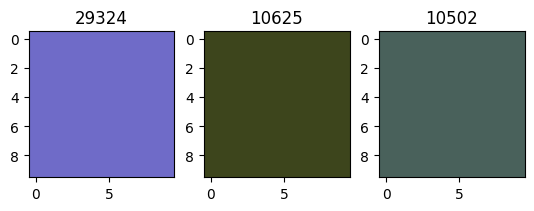

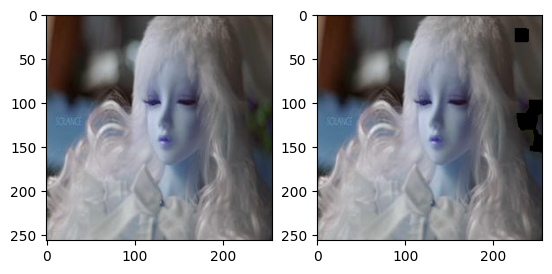

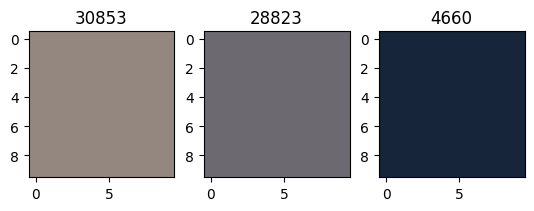

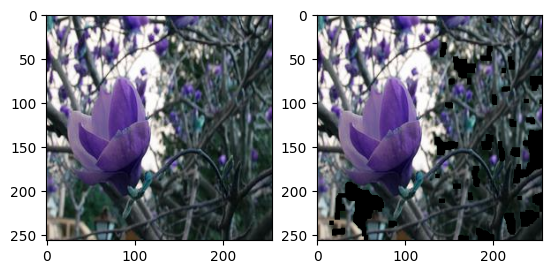

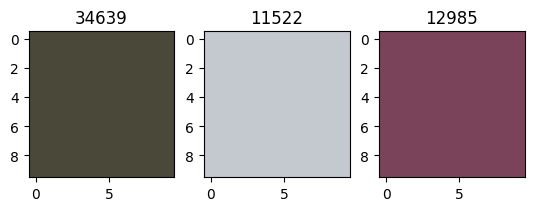

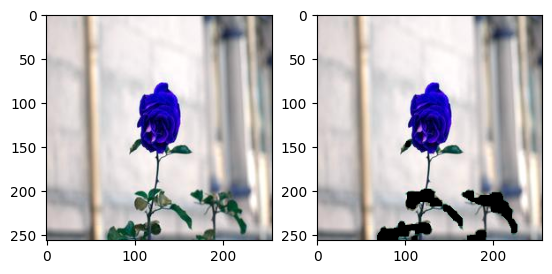

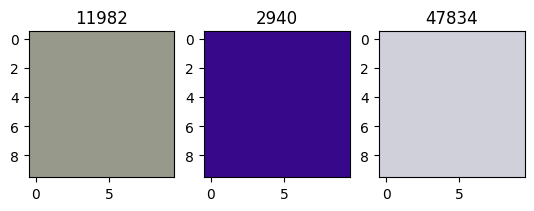

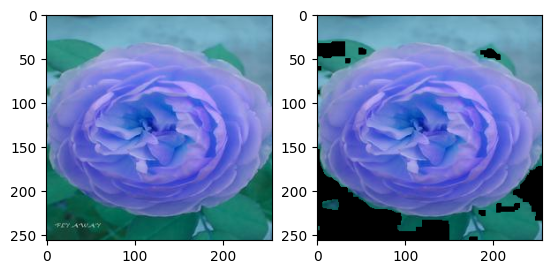

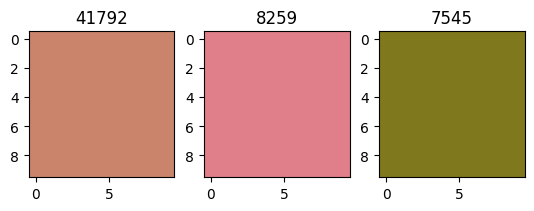

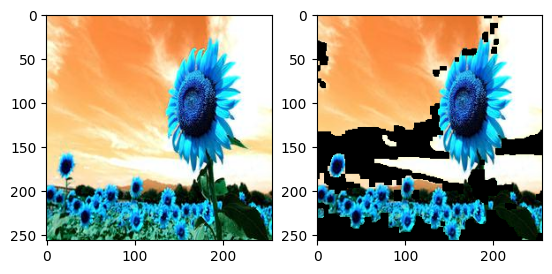

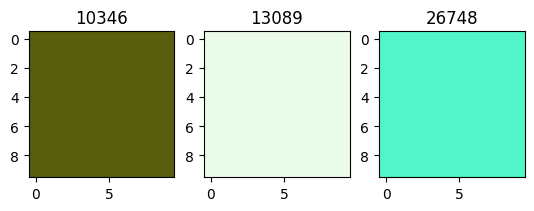

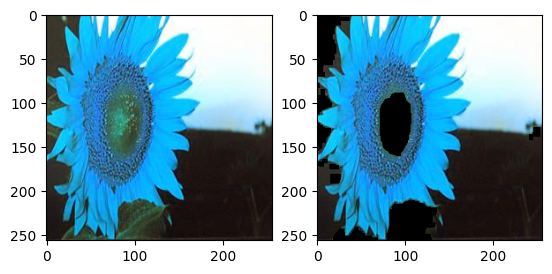

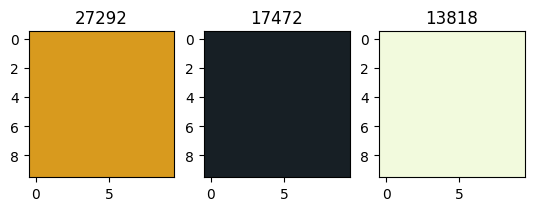

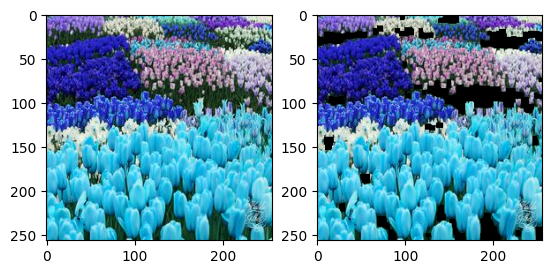

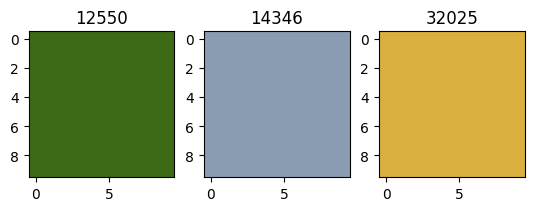

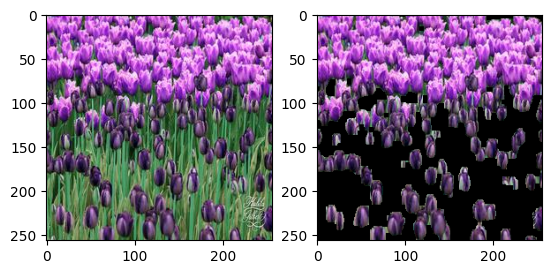

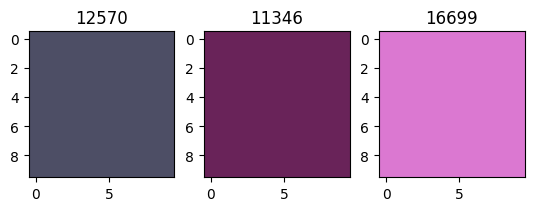

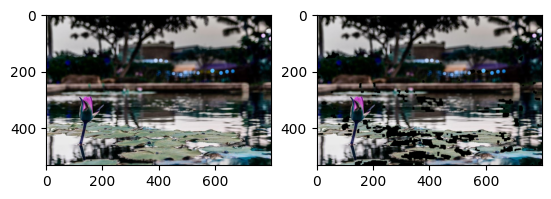

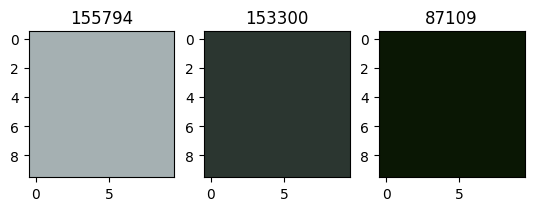

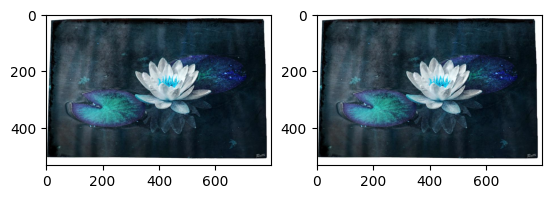

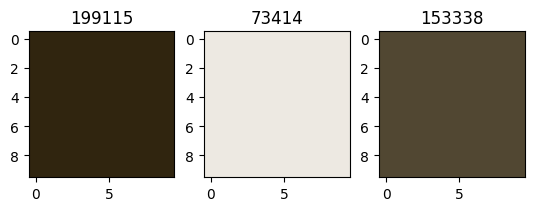

In [1]:
# we will need to manually add labels for color, since all we have right now is species.
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans


def extract_flower_color(image_path):
    # read in image
    img_bgr = cv2.imread(image_path)
    img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)  # convert to hsv

    # remove greens
    lower = np.array([35, 40, 40])  # remove green hues, between 35 and 85, also extremely dull colors
    upper = np.array([100, 255, 255])
    mask = cv2.inRange(img_hsv, lower, upper)
    mask = cv2.bitwise_not(mask)

    # cleanup and mask
    kernel = np.ones((5,5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    segmented = cv2.bitwise_and(img_bgr,img_bgr,mask=mask)
    plt.subplot(1,2,1); plt.imshow(img_bgr)
    plt.subplot(1,2,2); plt.imshow(segmented)
    plt.show()

    # convert to LAB - better for distinguishing color similarities
    img_lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)

    # extract pixels and flatten
    pixels = np.where(mask > 0)
    pixels_lab = img_hsv[pixels[0], pixels[1], :]
    #print(pixels_lab.shape)

    # apply kmeans
    kmeans = KMeans(n_clusters = k, random_state=25).fit(pixels_lab)
    labels, centers = kmeans.labels_, kmeans.cluster_centers_
    #print(labels, centers)

    # count how many pixels were clustered into each group
    counts = np.bincount(labels)
    #print(counts)

    # grab cenrtoids and counts
    centroids = []
    for cluster_index, count in enumerate(counts):
        centroids.append((centers[cluster_index], int(count)))

    for i in range(k):
        color = centroids[i][0]
        frequency = centroids[i][1]
        #print(frequency)
        color = np.uint8([[color]])
        rgb = cv2.cvtColor(color, cv2.COLOR_HSV2RGB)
        #print(rgb)
        box = np.zeros((10,10,3), dtype=np.uint8)
        box[:,:] = rgb

        plt.subplot(1,k,i+1); plt.imshow(box); plt.title(frequency)
        
    plt.show()

    return img_lab, centroids

k = 3

species = 'dandelion/'
image_paths = os.listdir(f'flowers')
print(image_paths)

for i in range(len(image_paths)):
    species = image_paths[i]
    species_list = os.listdir('flowers/' + species)
    for j in range(2):
        lab, centroids = extract_flower_color('flowers/' + species + '/'+species_list[j+3])
        #print(lab)


In [ ]:
# function to cluster the top 3-5 colors in the image
def cluster_colors(img, mask, k):
    # convert to LAB - better for distinguishing color similarities
    img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

    # extract pixels and flatten
    pixels = np.where(mask > 0)
    pixels_lab = img_lab[pixels[0], pixels[1], :]
    print(pixels_lab.shape)

    # apply kmeans
    kmeans = KMeans(n_clusters = k, random_state=25).fit(pixels_lab)
    labels, centers = kmeans.labels_, kmeans.cluster_centers_
    print(labels, centers)

    # count how many pixels were clustered into each group
    counts = np.bincount(labels)
    print(counts)

    # grab cenrtoids and counts
    centroids = []
    for cluster_index, count in enumerate(counts):
        centroids.append((centers[cluster_index], int(count)))

    return img_lab, centroids

k = 3
lab, centroids = cluster_colors(extracted_img, mask, k)
print(centroids)

(158434, 3)
[0 0 0 ... 0 0 0] [[  1.85724428 128.18329116 128.653548  ]
 [106.18932007 154.73588116 133.6864734 ]
 [ 49.22992874 131.14311164 138.06342043]]
[87511 45756 25167]
[(array([  1.85724428, 128.18329116, 128.653548  ]), 87511), (array([106.18932007, 154.73588116, 133.6864734 ]), 45756), (array([ 49.22992874, 131.14311164, 138.06342043]), 25167)]


87511


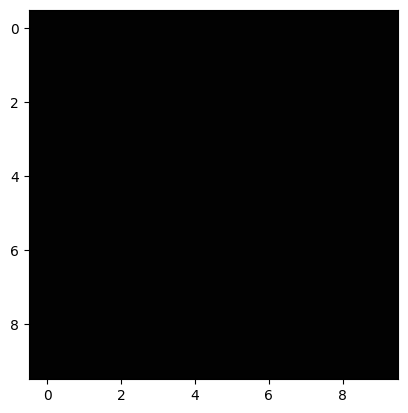

45756


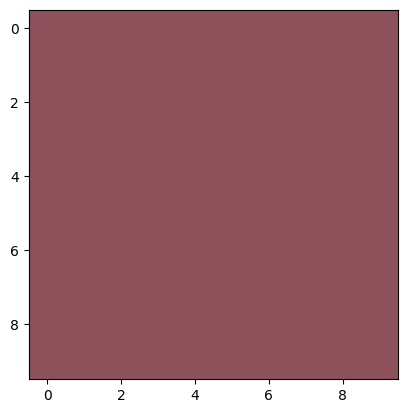

25167


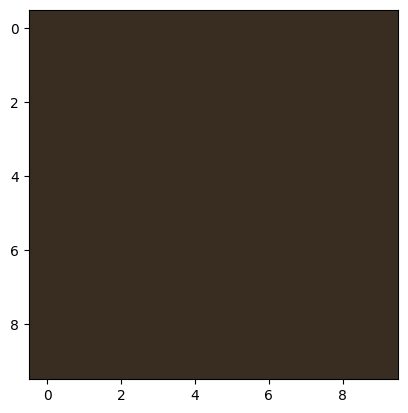

In [ ]:
for i in range(k):
    color = centroids[i][0]
    frequency = centroids[i][1]
    print(frequency)
    color = np.uint8([[color]])
    rgb = cv2.cvtColor(color, cv2.COLOR_LAB2RGB)
    #print(rgb)

    box = np.zeros((10,10,3), dtype=np.uint8)
    box[:,:] = rgb

    plt.imshow(box)
    plt.show()